## Prediction of heart failure with ANN

Data from Kaggle: https://www.kaggle.com/code/surajjha101/heart-failure-prediction-svm-and-ann/notebook#list-tab

In [1]:

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns



In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

from IPython import display

2023-06-16 13:34:39.332024: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading the dataset

In [3]:
## loading train dataset 
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Descriptive Analysis

In [4]:
df.info()
## there are 299 records and 13 columns ( 12 features + 1 target variable: DEATH_EVENT)
## 6 encoded categorical variables and remaining 6 numeric variables
## 3 float columns and 9 integer columns 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


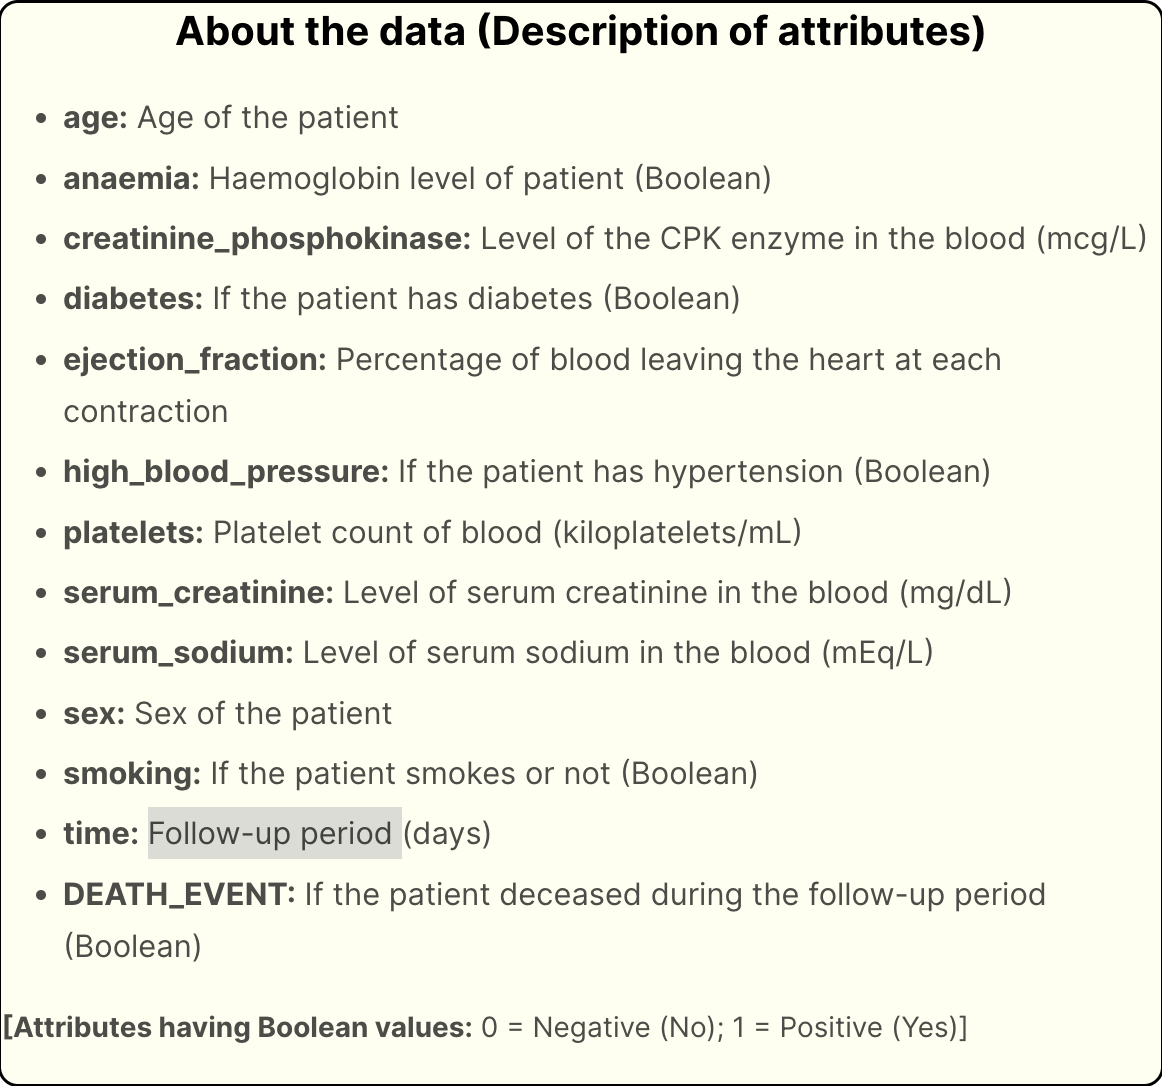

In [5]:
#Description about the dataset's characteristics
display.Image('description_attributes.png',width = 400)

In [6]:
## statistics of variables
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
## explore unique values for each column
column_names = list(df.columns)
for col in column_names:
    print(col, ':', df[col].nunique(), )

age : 47
anaemia : 2
creatinine_phosphokinase : 208
diabetes : 2
ejection_fraction : 17
high_blood_pressure : 2
platelets : 176
serum_creatinine : 40
serum_sodium : 27
sex : 2
smoking : 2
time : 148
DEATH_EVENT : 2


In [8]:
## separating the column names into numerical and categorical
num_col = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium', 'time']
cat_col = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']

## to get subset of df 
#df.loc[:,['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']]

## Cleaning the dataset

In [9]:
## checking misssing values: no missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

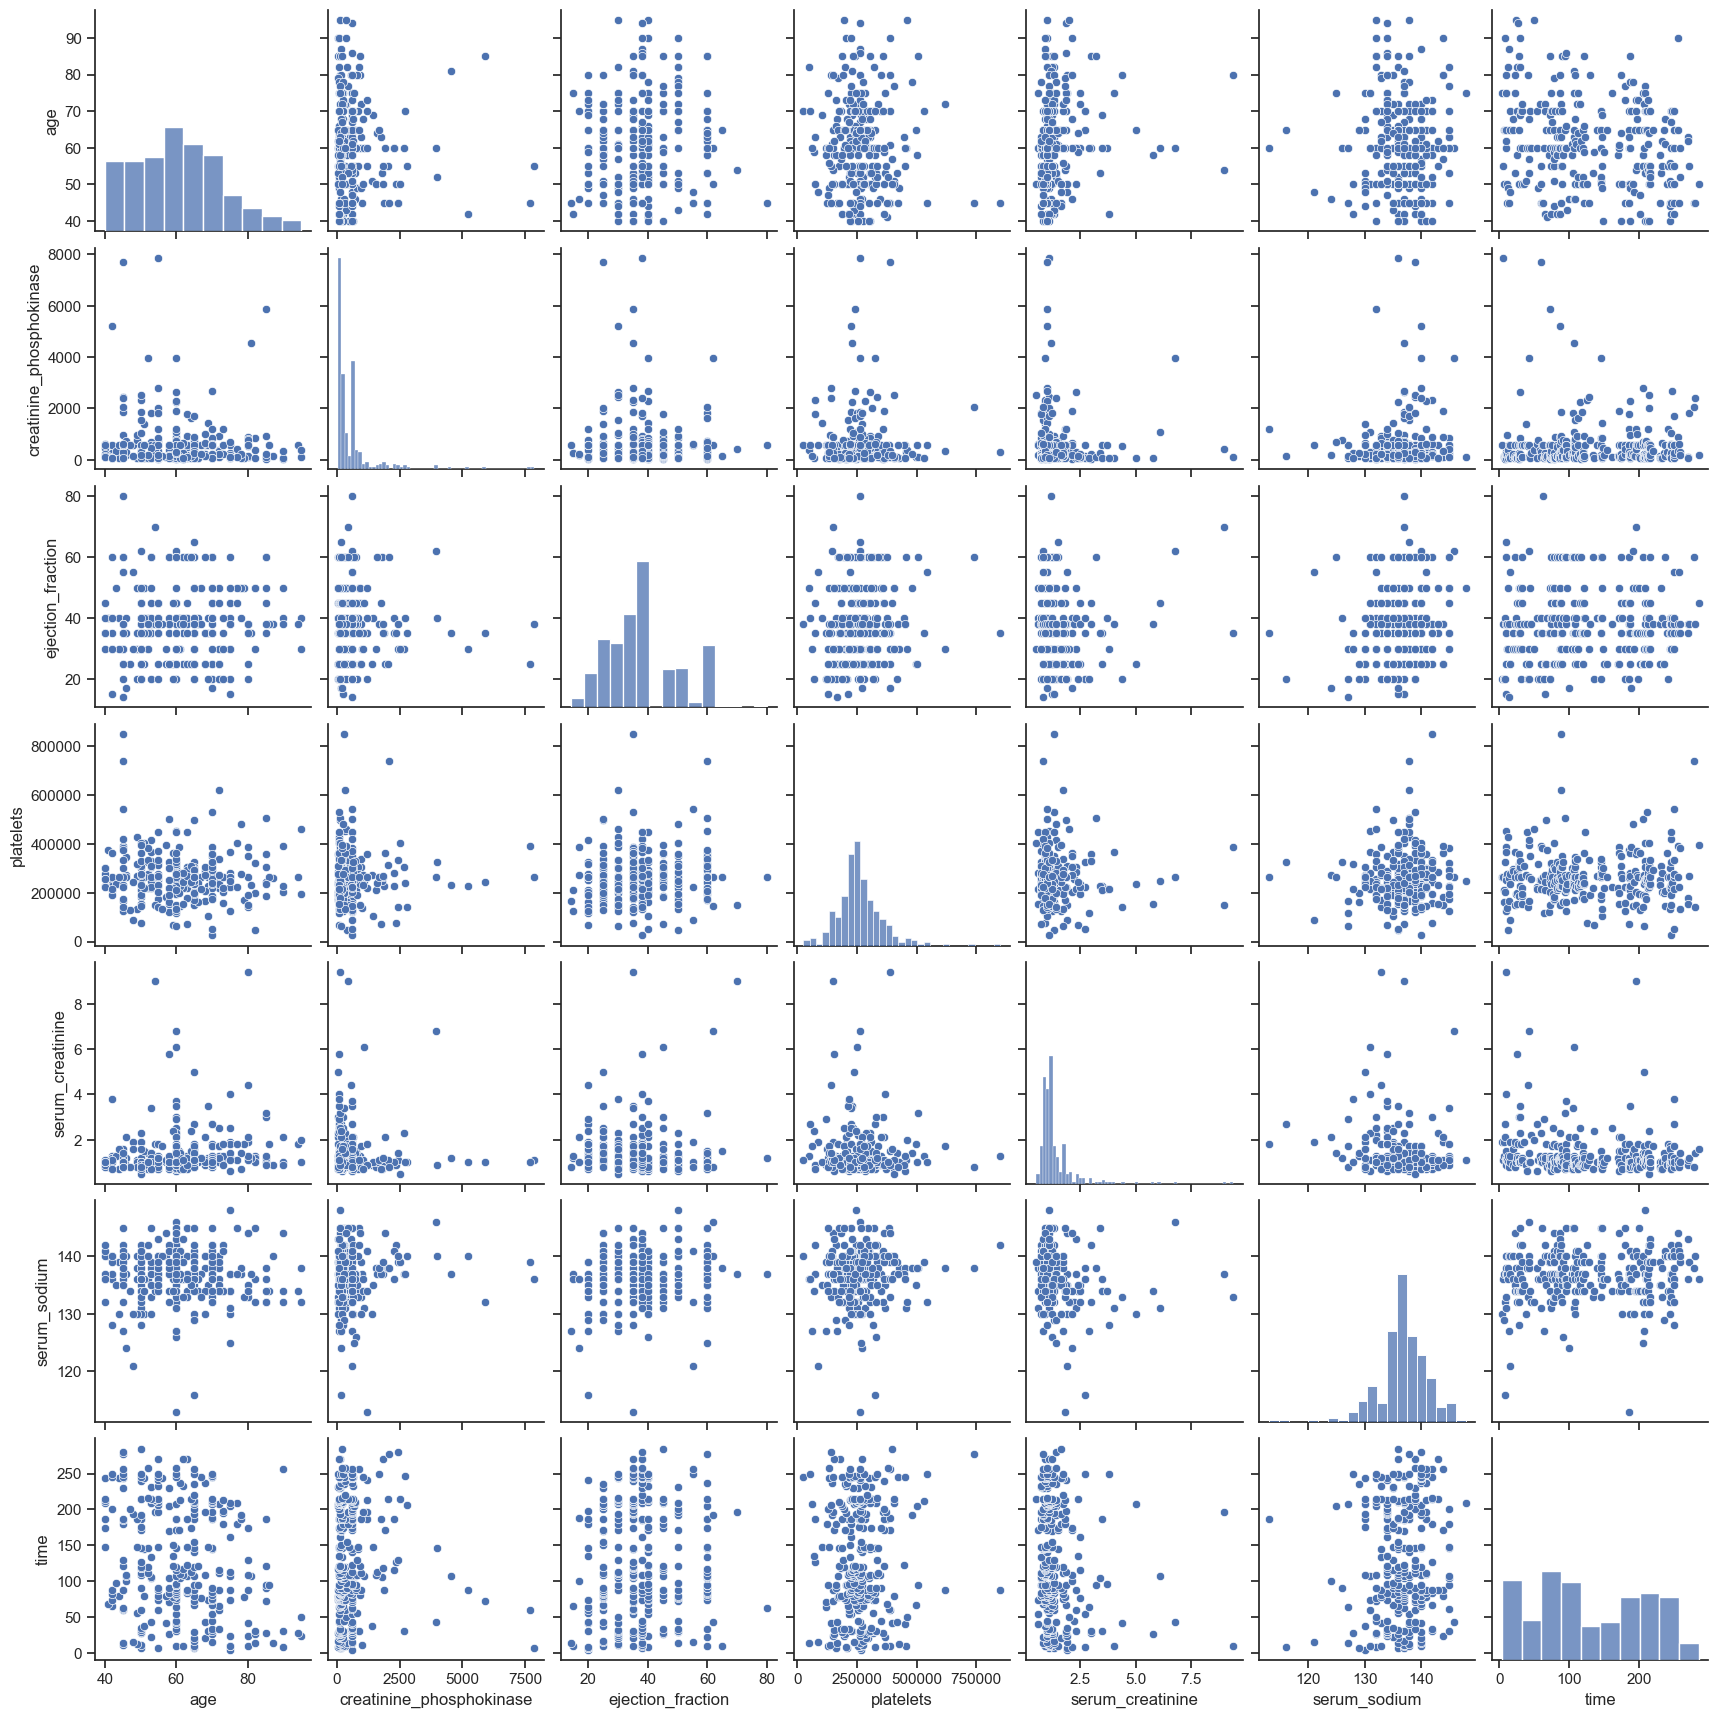

In [10]:
## inital pairplot visualisation to see overall dsitribution or relationship
sns.set_theme(style="ticks")
sns.pairplot(df.loc[:,num_col])

## int the diagonal we can see that the variables seems to follow the normal distribution but are very skewed due to outliers. So we will convert outliers
## to the median. We cannot remove the records as there are only 299 records. 

In [11]:
## convert all outliers into the median as the mean is affected by the outliers

for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    UB = Q3 + 1.5* IQR #1280.25 upper bound for outliers
    LB = Q1 - 1.5* IQR #lowe upper bound for outliers
    df[col] = np.where(df[col] > UB, int(df[col].mean()),df[col])
    df[col] = np.where(df[col] < LB, int(df[col].mean()),df[col])
    

#to get the outliers in df format
#print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,581,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,1.0,136,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,581,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,581,1,60,0,263358.00,0.8,138,0,0,278,0
297,45.0,0,581,0,38,0,140000.00,1.4,140,1,1,280,0


In [12]:
## check whether we should convert the float column 'age' into an integer as the values seems to be all ending in .00
age_df = df['age']
count_0_age = 0
count_not0_age= 0
for a in age_df:
    if a%1==0:
        count_0_age += 1
    else:
        count_not0_age += 1
        print(a)
print(f'Number of values ending with .00 is {count_0_age}.')
print(f'Number of values not ending with .00 is {count_not0_age}.')
#there is only 2 values not ending with .00 so we can convert it to an integer type

60.667
60.667
Number of values ending with .00 is 297.
Number of values not ending with .00 is 2.


In [13]:
## check whether we should convert the float column 'platelets' into an integer as the values seems to be all ending in .00
plat_df = df['platelets']
count_0_plat = 0
count_not0_plat= 0
for a in plat_df:
    if a%1==0:
        count_0_plat += 1
    else:
        count_not0_plat += 1
        print(a)
print(f'Number of values ending with .00 is {count_0_plat}.')
print(f'Number of values not ending with .00 is {count_not0_plat}.')
#there is only 2 values not ending with .00 so we can convert it to an integer type

263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
263358.03
Number of values ending with .00 is 274.
Number of values not ending with .00 is 25.


In [14]:
## convert 'age' and 'platelets' to an integer type
df['age'] = df['age'].astype(int)
df['platelets'] = df['platelets'].astype(int)


In [15]:
## the clean to be analysed and worked on

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,581,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,1.0,136,0,0,8,1


## Data Analysis

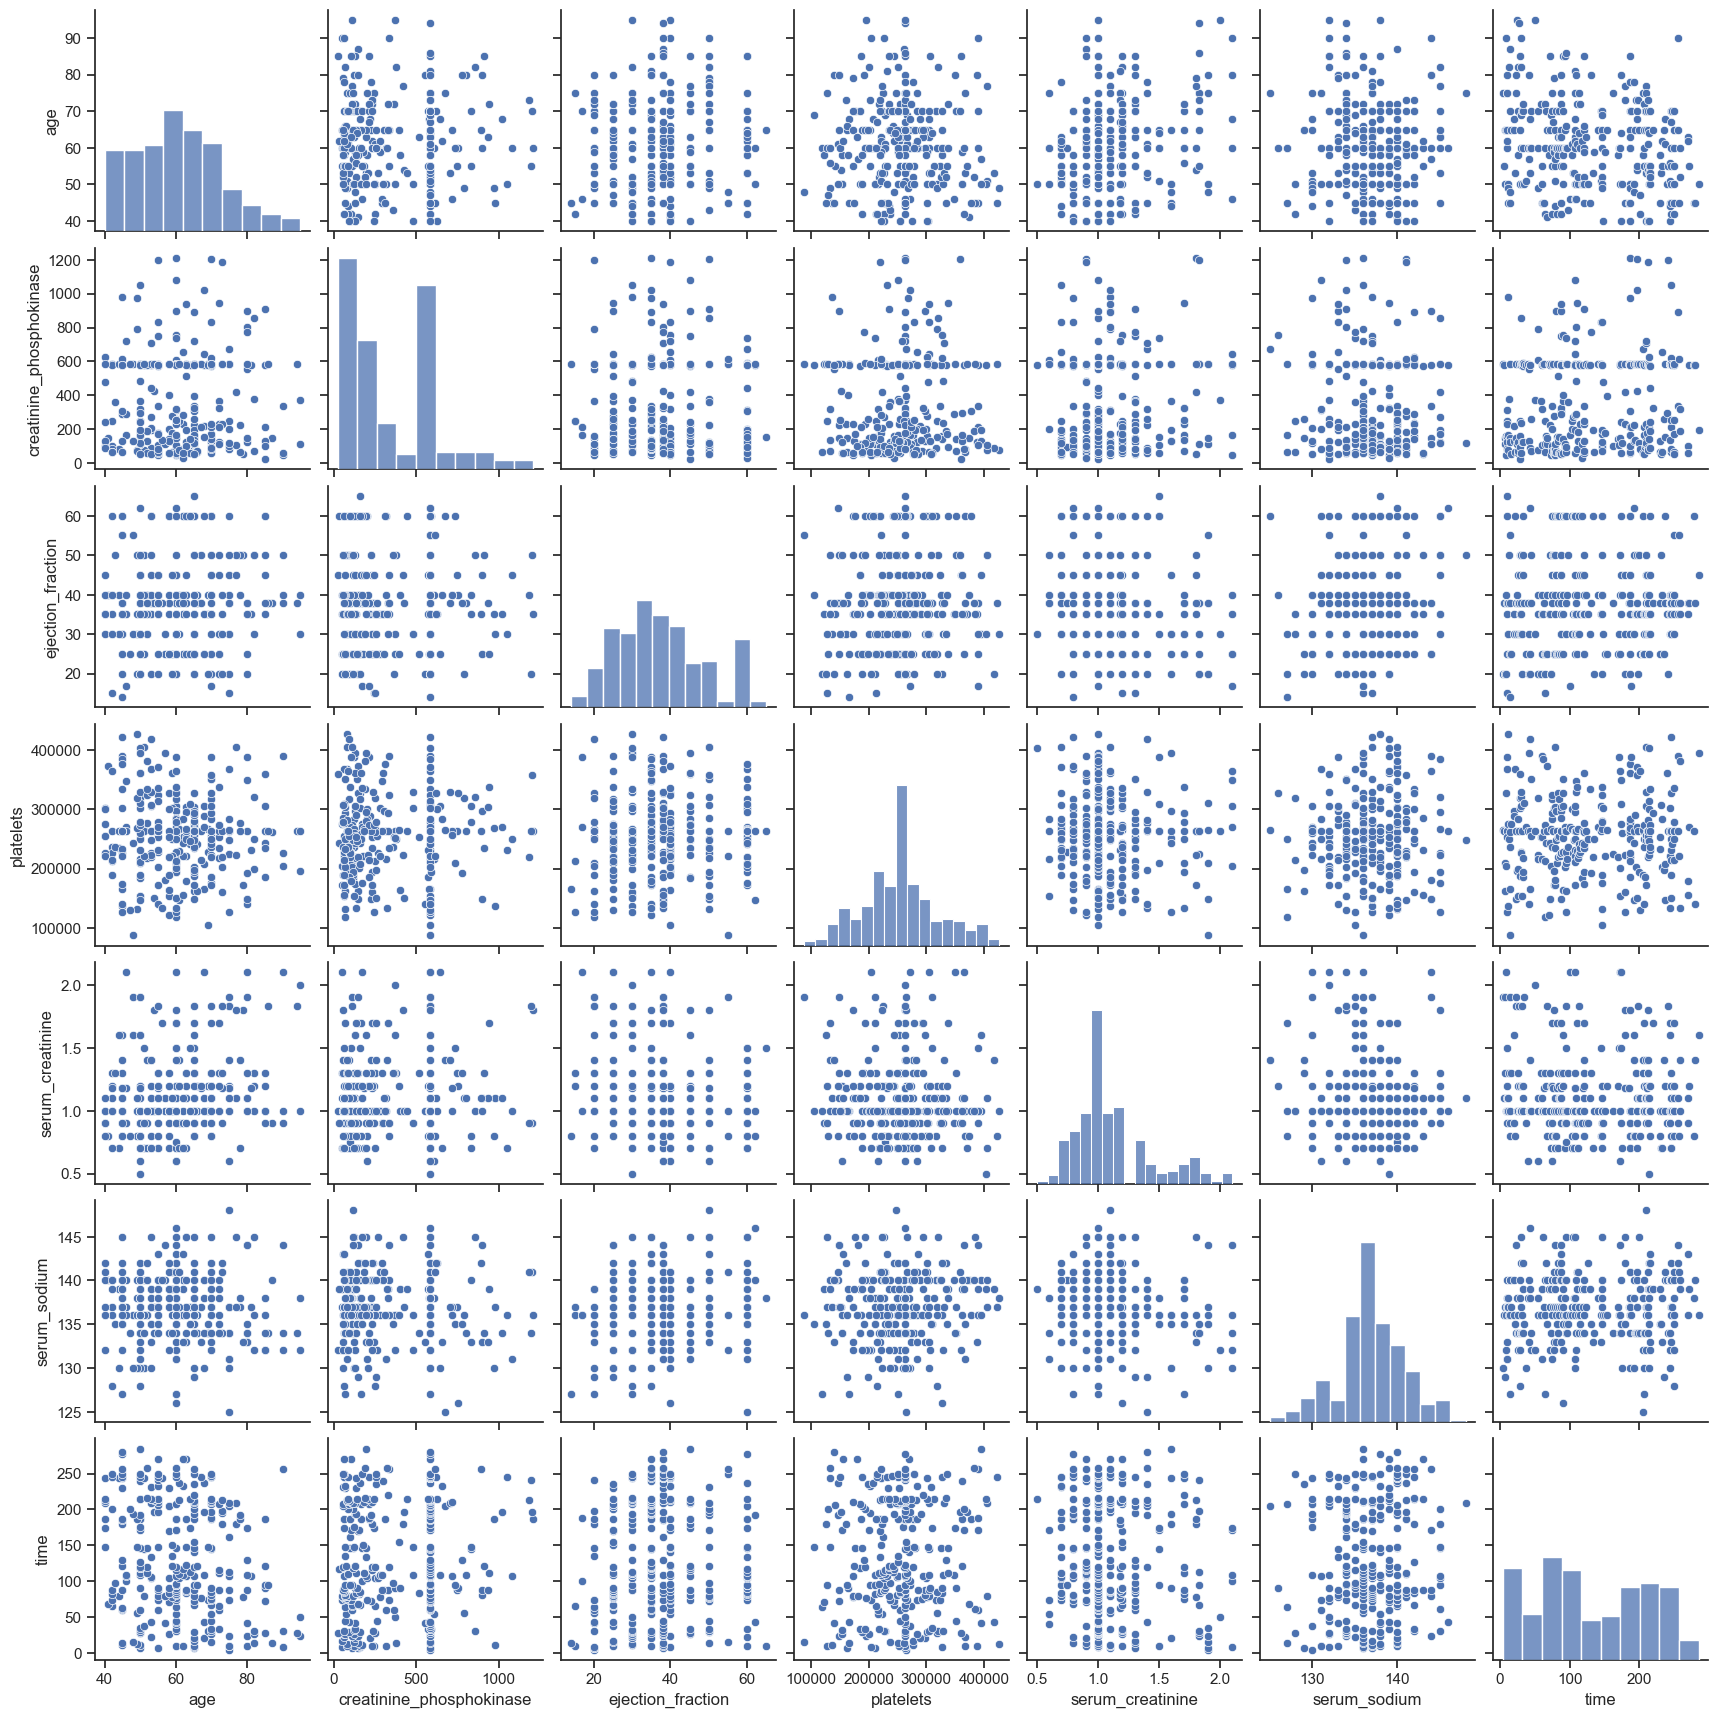

In [16]:
## scatterplot for each pair of the numerical columns after converting the outliers
## we can see better the normal distribution
sns.set_theme(style="ticks")
sns.pairplot(df.loc[:,num_col])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'age'),
  Text(2, 0, 'anaemia'),
  Text(3, 0, 'creatinine_phosphokinase'),
  Text(4, 0, 'diabetes'),
  Text(5, 0, 'ejection_fraction'),
  Text(6, 0, 'high_blood_pressure'),
  Text(7, 0, 'platelets'),
  Text(8, 0, 'serum_creatinine'),
  Text(9, 0, 'serum_sodium'),
  Text(10, 0, 'sex'),
  Text(11, 0, 'smoking'),
  Text(12, 0, 'time'),
  Text(13, 0, 'DEATH_EVENT')])

<Figure size 10000x10000 with 0 Axes>

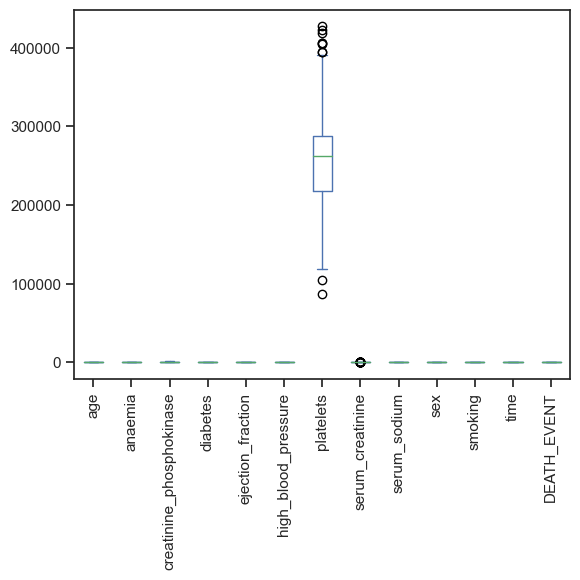

In [17]:
## explore general distribution of data after outliers converted to median
plt.figure(figsize=(100,100))
df.plot(kind='box')
plt.xticks( rotation = 90)
#plateles's data scale is extremley different others, therefore stnadardisation will be needed

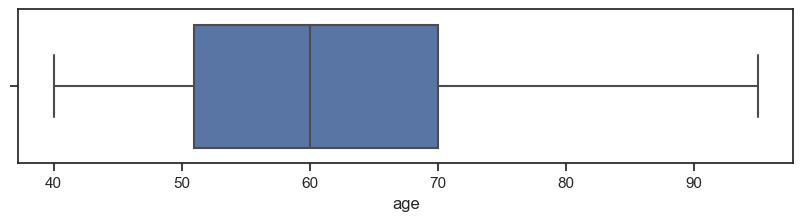

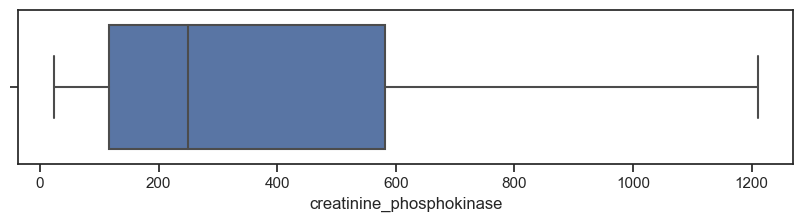

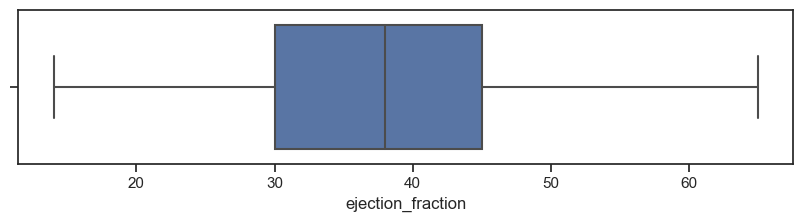

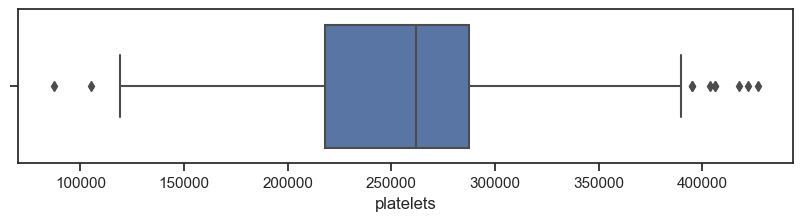

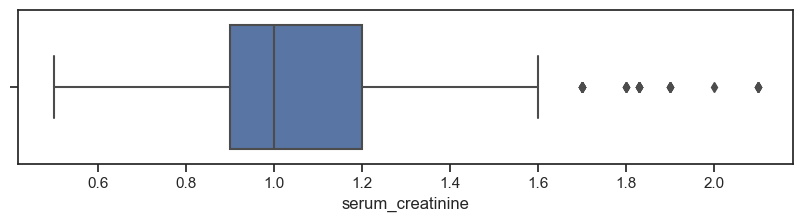

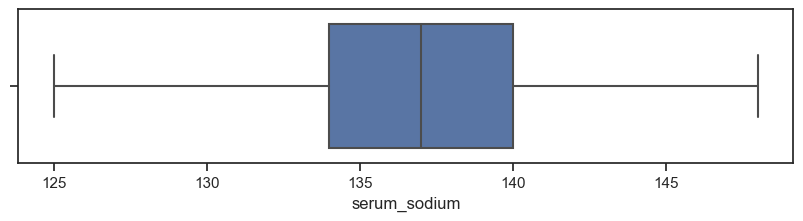

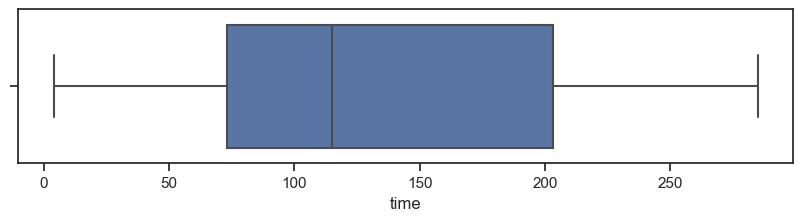

In [18]:
## explore distribution of each characteristic using boxplots after outliers converted to median
#numerical data in num_df
for column in num_col:
    plt.figure(figsize=(10,2))
    #df.boxplot([column])
    sns.boxplot(data=df, x=column)

/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_39888/1579045584.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:g}%' for x in vals])


[Text(0, 0, 'not dead'), Text(1, 0, 'dead')]

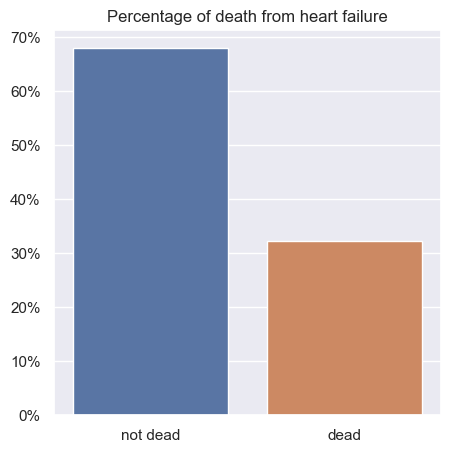

In [19]:
## count of people dead from heart failure 
death_count = df.groupby(['DEATH_EVENT']).size().reset_index(name="Count")
death_count['Percentage'] = round(death_count['Count'] *100/ len(df),2)
death_count

plt.figure(figsize=(5,5))
sns.set(style="darkgrid")
ax = sns.barplot(x = "DEATH_EVENT", y = 'Percentage',data=death_count )
ax.set_title('Percentage of death from heart failure')
ax.set( xlabel= None , ylabel= None)
vals = ax.get_yticks()
ax.set_yticklabels([f'{x:g}%' for x in vals])
ax.set_xticklabels(['not dead', 'dead'])

## suggests that there's an imbalance of dataset so the model might be better in predicting the outcome for people who didn't die

/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_39888/3788008145.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:g}%' for x in vals])
/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_39888/3788008145.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:g}%' for x in vals])
/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_39888/3788008145.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:g}%' for x in vals])
/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_39888/3788008145.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:g}%' for x in vals])
/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_39888/3788008145.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabe

ValueError: cannot insert DEATH_EVENT, already exists

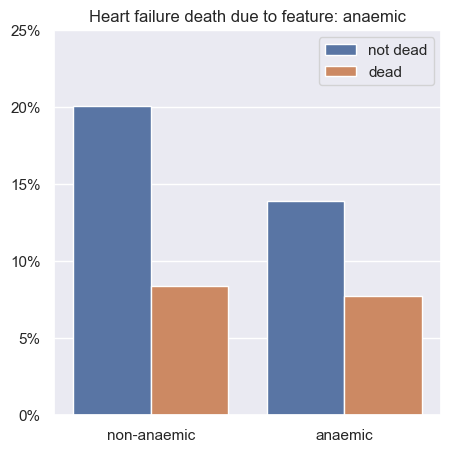

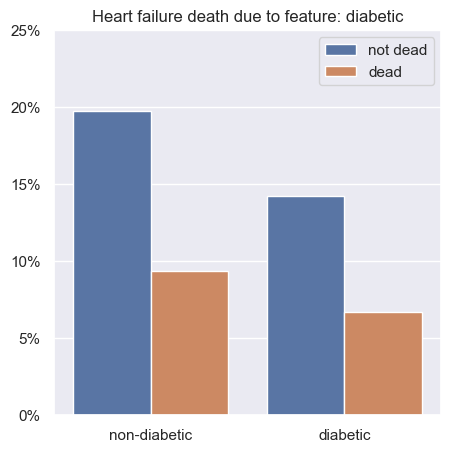

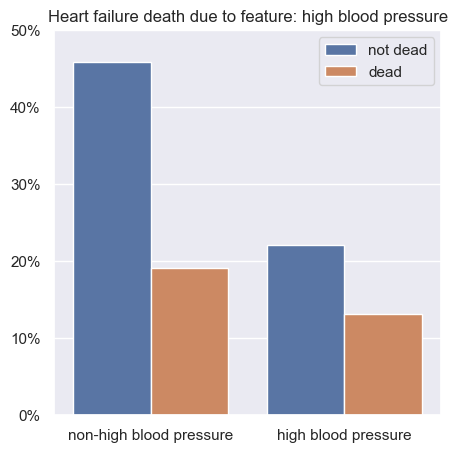

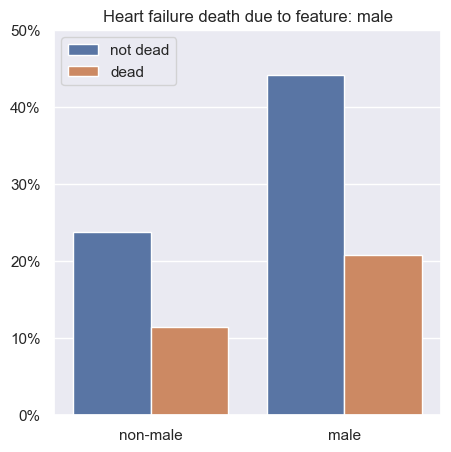

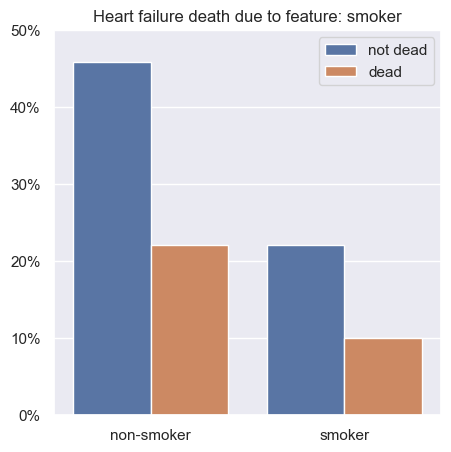

In [20]:
## subsetting the df with only categorical variables 
cat_col_df = df.loc[:,['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']]

## rename the column names to be used to create barplots in the loop below
cat_col_df.rename(columns={'anaemia': 'anaemic', 'diabetes': 'diabetic','high_blood_pressure': 'high blood pressure', 'sex': 'male','smoking': 'smoker', 'DEATH_EVENT': 'DEATH_EVENT'}, inplace=True)
cat_col_df

## loop to creat a barplot for each feature 
for col in cat_col_df[:-1]:   
    death_count = cat_col_df.groupby(['DEATH_EVENT',col]).size().reset_index(name="Count")
    death_count['Percentage'] = round(death_count['Count'] *100/ len(df),2)
    death_count

    plt.figure(figsize=(5,5))
    sns.set(style="darkgrid")
    ax = sns.barplot(x = col , y = 'Percentage',data=death_count, hue="DEATH_EVENT" )
    ax.set_title(f'Heart failure death due to feature: {col}')
    ax.set( xlabel= None , ylabel= None)
    vals = ax.get_yticks()
    ax.set_yticklabels([f'{x:g}%' for x in vals])
    ax.set_xticklabels([f"non-{col}", f"{col}"])
    ax.set_ylim([0, 50])

    handles, labels = ax.get_legend_handles_labels()
    labels = ['not dead', 'dead']
    ax.legend(handles, labels)

/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_29034/4135836596.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:g}%' for x in vals])


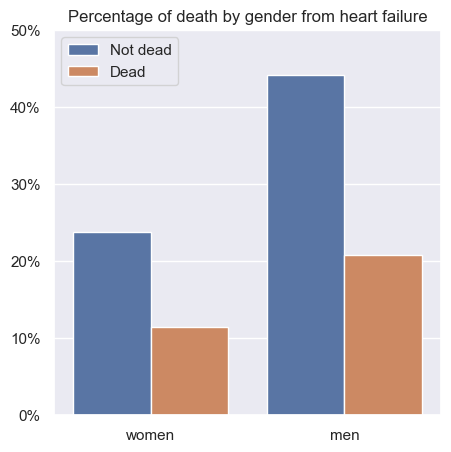

In [ ]:
## recreate the graph for sex so the legend makes sense (women, men instead of non-male and male)
death_count_sex = df.groupby(['DEATH_EVENT', 'sex']).size().reset_index(name="Count")
death_count_sex['Percentage'] = round(death_count_sex['Count'] *100/ len(df),2)
death_count_sex

plt.figure(figsize=(5,5))
sns.set(style="darkgrid")
ax = sns.barplot(x = "sex", y = 'Percentage',data=death_count_sex , hue='DEATH_EVENT')
ax.set_title('Percentage of death by gender from heart failure')
ax.set( xlabel= None , ylabel= None)
vals = ax.get_yticks()
ax.set_yticklabels([f'{x:g}%' for x in vals])
ax.set_xticklabels(["women", "men"])
ax.set_ylim([0, 50])


handles, labels = ax.get_legend_handles_labels()
labels = ['Not dead', 'Dead']
ax.legend(handles, labels)


## Correlation Matrix
To check the relationship between independent variables and target variable 'DEATH_EVENT'

Highest correlated variables:\
-time: -0.53\
-serum_creatinine: 0.29\
-ejection_fraction: -0.27\
-age: 0.25\
-serum_sodium: -0.2\
others below 0.1

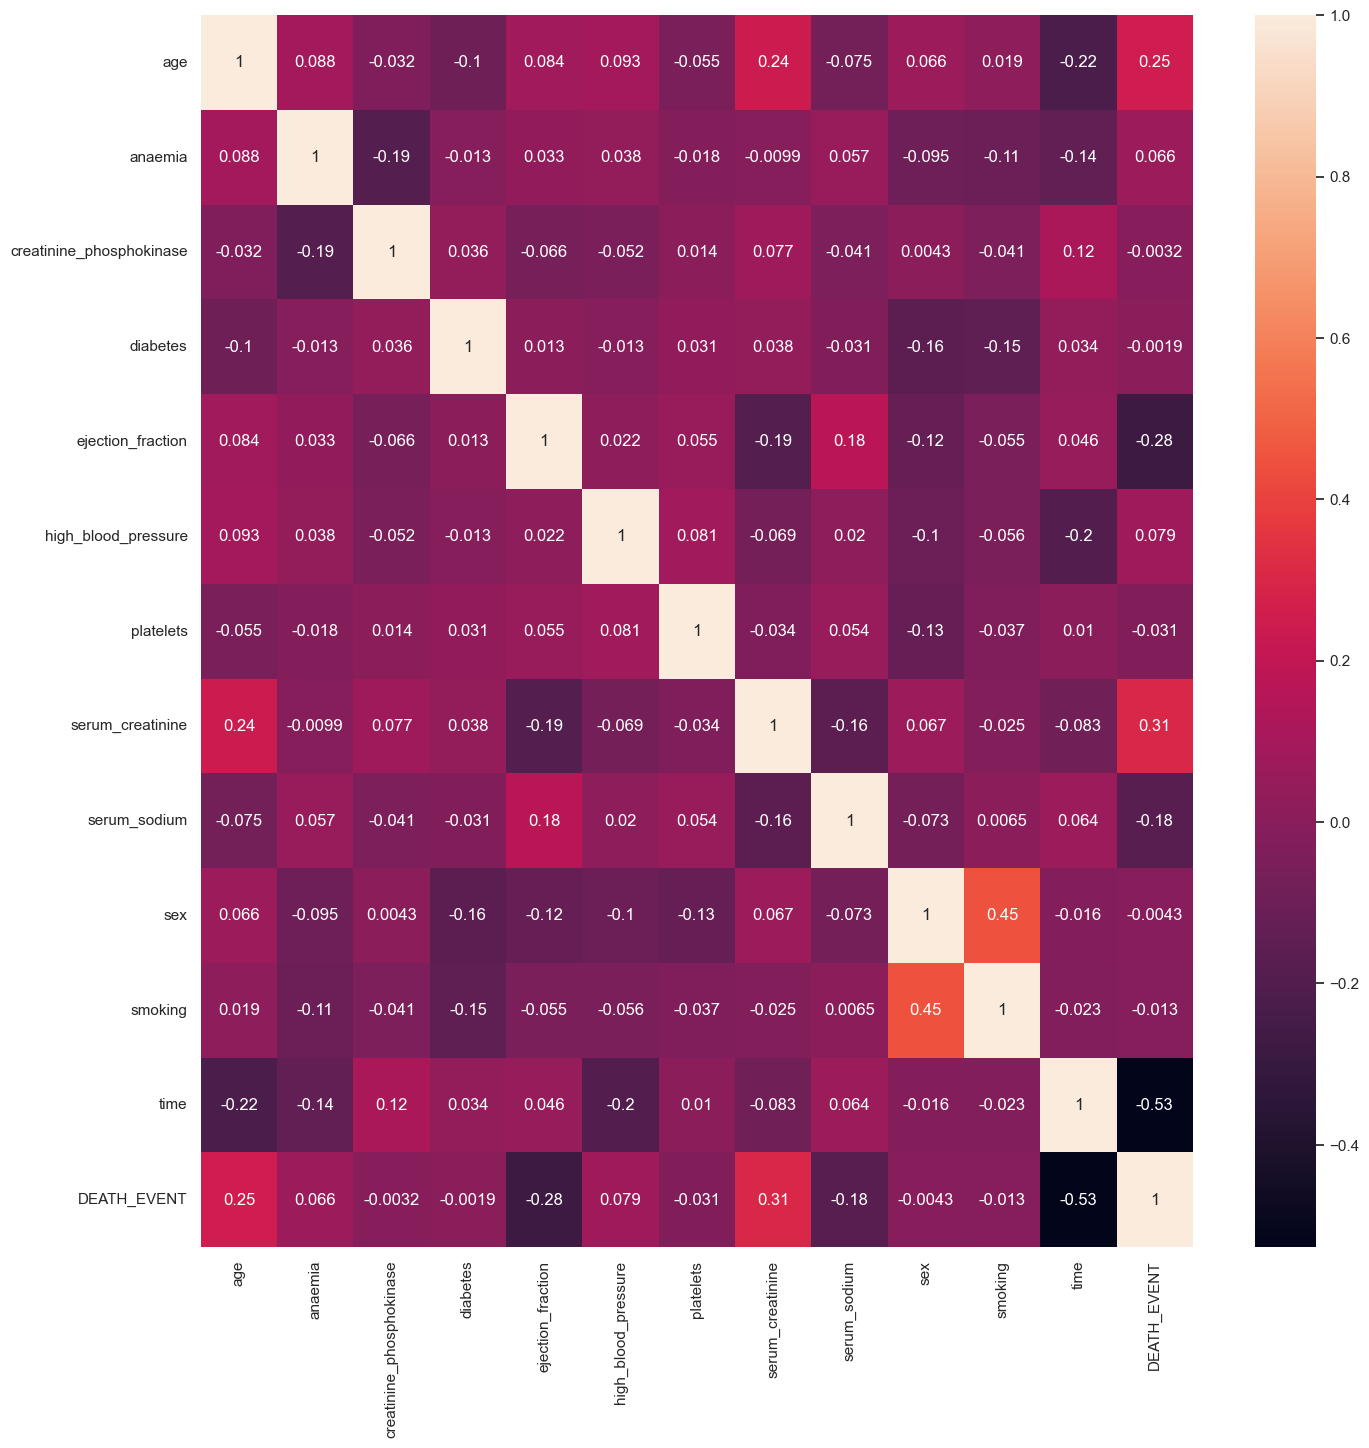

In [21]:
## check for correlation
corr_mat = df.corr()
corr_mat

## show correlation using heatmap
plt.figure(figsize=(16,16))
heat = sns.heatmap(corr_mat,annot=True) 
#heat.set_xticklabels(heat.get_xticklabels(), rotation=45)


## Splitting data into training and testing

In [22]:
## select dep and indep 
X = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values

# spplit into train test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=32) 

In [23]:
## standardisation
# input data is transformed to have a mean of zero and a std of 1 
scaler_x = StandardScaler() #create object 
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test) 

## Model 1 

In [ ]:
## initialise the simple neural network
model = Sequential() 

## input layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation =  'relu', input_dim = 12)) 

## hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation =  'relu'))

## regularisation -- help to stop overfitting
model.add(Dropout(0.25)) #0.25 = 25% random will be set to 0 during training

## output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation =  'sigmoid')) 

## compiling the ANN
model.compile(optimizer = 'adam', loss =  'binary_crossentropy', metrics=['accuracy']) 

In [ ]:
## summary: information about shape, type and parameters of network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## train our network
## 20% for testing, 25% for validation and 55% for training
history = model.fit(X_train, y_train, batch_size = 32, epochs = 80, validation_split =0.25 )

#0.5 without simple change
#0.6 with replacing outliers with median values
#0.8 with standardisation: loss: 0.4002 - accuracy: 0.8883 - val_loss: 0.4244 - val_accuracy: 0.8333
# another replace same code : loss: 0.3968 - accuracy: 0.8603 - val_loss: 0.4326 - val_accuracy: 0.8333 - worse 
# with median  loss: 0.3215 - accuracy: 0.9106 - val_loss: 0.4741 - val_accuracy: 0.8333

Epoch 1/80
6/6 [==============================] - 2s 58ms/step - loss: 0.6930 - accuracy: 0.5475 - val_loss: 0.6924 - val_accuracy: 0.7333
Epoch 2/80
6/6 [==============================] - 0s 16ms/step - loss: 0.6923 - accuracy: 0.6592 - val_loss: 0.6909 - val_accuracy: 0.7333
Epoch 3/80
6/6 [==============================] - 0s 20ms/step - loss: 0.6911 - accuracy: 0.6592 - val_loss: 0.6894 - val_accuracy: 0.7333
Epoch 4/80
6/6 [==============================] - 0s 18ms/step - loss: 0.6900 - accuracy: 0.6592 - val_loss: 0.6876 - val_accuracy: 0.7333
Epoch 5/80
6/6 [==============================] - 0s 15ms/step - loss: 0.6885 - accuracy: 0.6592 - val_loss: 0.6854 - val_accuracy: 0.7333
Epoch 6/80
6/6 [==============================] - 0s 15ms/step - loss: 0.6866 - accuracy: 0.6592 - val_loss: 0.6827 - val_accuracy: 0.7333
Epoch 7/80
6/6 [==============================] - 0s 16ms/step - loss: 0.6841 - accuracy: 0.6592 - val_loss: 0.6793 - val_accuracy: 0.7333
Epoch 8/80
6/6 [===========

## Model 1 

Model 1: loss: 0.3402 - accuracy: 0.8436 - val_loss: 0.3690 - val_accuracy: 0.8500

In [ ]:
## save our model
#model.save('ann_model1')

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=32) 

## initialise the simple neural network
#model = Sequential() 

## input layers
#model.add(Dense(units = 16, kernel_initializer = 'uniform', activation =  'relu', input_dim = 12)) 

## hidden layer
#model.add(Dense(units = 8, kernel_initializer = 'uniform', activation =  'relu'))

## regularisation -- help to stop overfitting
#model.add(Dropout(0.25)) #0.25 = 25% random will be set to 0 during training

## output layer
#model.add(Dense(units = 1, kernel_initializer = 'uniform', activation =  'sigmoid')) 

## compiling the ANN
#model.compile(optimizer = 'adam', loss =  'binary_crossentropy', metrics=['accuracy']) 

## 20% for testing, 25% for validation and 55% for training
#history = model.fit(X_train, y_train, batch_size = 32, epochs = 80, validation_split =0.25 )


#loss: 0.3402 - accuracy: 0.8436 - val_loss: 0.3690 - val_accuracy: 0.8500

2023-06-16 12:31:30.151390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,8]
	 [[{{node inputs}}]]
2023-06-16 12:31:30.358160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,8]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ann_model1/assets


INFO:tensorflow:Assets written to: ann_model1/assets


In [ ]:
##load, saved model
model = tf.keras.models.load_model('ann_model1')

In [ ]:
## predict X_test with model1
y_pred = model.predict(X_test)
y_pred

2/2 [==============================] - 0s 6ms/step


array([[4.31992739e-01],
       [6.85791820e-02],
       [1.89077035e-02],
       [5.47898054e-01],
       [5.38594007e-01],
       [1.48444669e-02],
       [3.80765468e-01],
       [5.03598538e-04],
       [1.24678472e-02],
       [2.92545050e-01],
       [1.29697666e-01],
       [2.62635648e-01],
       [5.28115094e-01],
       [8.47202659e-01],
       [2.53022254e-01],
       [8.55601877e-02],
       [9.97557119e-02],
       [3.83099578e-02],
       [2.38670260e-01],
       [4.25316185e-01],
       [7.17612565e-01],
       [7.03282654e-01],
       [3.56781304e-01],
       [4.90232185e-02],
       [6.04904234e-01],
       [2.21535653e-01],
       [9.71743464e-02],
       [7.48406768e-01],
       [6.18753195e-01],
       [2.11224049e-01],
       [8.34326446e-01],
       [2.97026094e-02],
       [8.86756003e-01],
       [5.73132396e-01],
       [7.32748747e-01],
       [2.35618707e-02],
       [8.83504935e-03],
       [2.13995483e-02],
       [2.68133041e-02],
       [8.65155756e-01],


In [ ]:
## cap value
y_pred = np.where(y_pred > 0.5, 1, 0) #anything above 0.5 make it 1, else 0
y_pred

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0]])

In [ ]:
## classification report
print(classification_report(y_test, y_pred)) #needs binary

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.65      0.68      0.67        19

    accuracy                           0.78        60
   macro avg       0.75      0.76      0.75        60
weighted avg       0.79      0.78      0.78        60



In [ ]:
#confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[34,  7],
       [ 6, 13]])

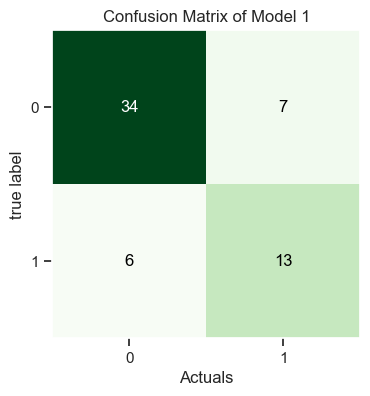

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat = conf_mat , figsize = (4,4), cmap = 'Greens')
plt.xlabel('Predictions', fontsize = 12 )
plt.xlabel('Actuals', fontsize = 12 )
plt.title('Confusion Matrix of Model 1', fontsize = 12 )
plt.show()

AUC: 0.756739


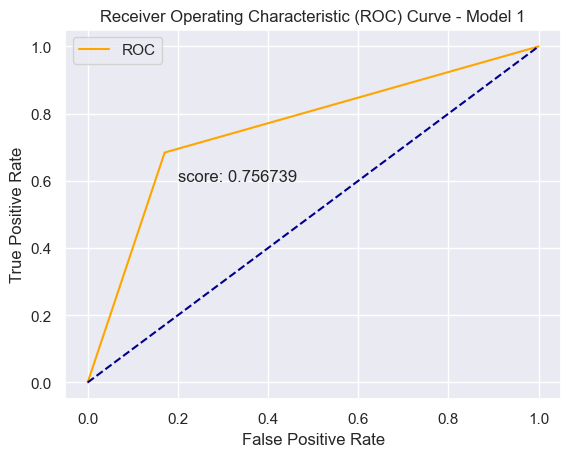

In [ ]:
## CALCULATE AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %f' %auc)


fpr, tpr = roc_curve(y_test, y_pred)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Model 1')
plt.text(y= 0.6, x=0.2, s=f'score: {round(auc,6)}')
plt.legend()
plt.show()

## Model 2 

Added another 2nd hidden layer at units 4 

Model 1: loss: 0.3402 - accuracy: 0.8436 - val_loss: 0.3690 - val_accuracy: 0.8500
Model 2: loss: 0.4240 - accuracy: 0.8492 - val_loss: 0.4184 - val_accuracy: 0.8667

In [ ]:
## initialise the simple neural network
model2 = Sequential() 

## input layers
model2.add(Dense(units = 16, kernel_initializer = 'uniform', activation =  'relu', input_dim = 12)) 

## hidden layer
model2.add(Dense(units = 8, kernel_initializer = 'uniform', activation =  'relu'))

####### adding another layer
model2.add(Dense(units = 4, kernel_initializer = 'uniform', activation =  'relu'))

## regularisation -- help to stop overfitting
model2.add(Dropout(0.25)) #0.25 = 25% random will be set to 0 during training

## output layer
model2.add(Dense(units = 1, kernel_initializer = 'uniform', activation =  'sigmoid')) 

## compiling the ANN
model2.compile(optimizer = 'adam', loss =  'binary_crossentropy', metrics=['accuracy']) 

## summary: information about shape, type and parameters of network
model2.summary()

## train our network
## 20% for testing, 25% for validation and 55% for training
history2 = model2.fit(X_train, y_train, batch_size = 32, epochs = 80, validation_split =0.25 )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                208       
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
6/6 [==============================] - 2s 47m

In [ ]:
## save our model
#model2.save('ann_model2')


2023-06-16 12:46:59.661671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,4]
	 [[{{node inputs}}]]
2023-06-16 12:47:01.836139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,4]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ann_model2/assets


INFO:tensorflow:Assets written to: ann_model2/assets


In [ ]:
## load our saved data
model2 = tf.keras.models.load_model('ann_model2')

In [ ]:
## predict X_test with model
y_pred2 = model2.predict(X_test)
## cap value
y_pred2 = np.where(y_pred2 > 0.5, 1, 0) #anything above 0.5 make it 1, else 0
y_pred2

## classification report
print(classification_report(y_test, y_pred2)) 

2/2 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.68      0.68      0.68        19

    accuracy                           0.80        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.80      0.80      0.80        60



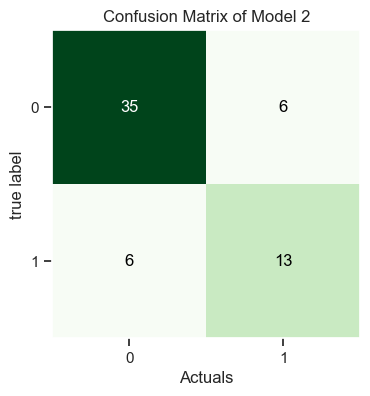

In [ ]:
#confusion matrix
conf_mat2 = confusion_matrix(y_test, y_pred2)
fig, ax = plot_confusion_matrix(conf_mat = conf_mat2 , figsize = (4,4), cmap = 'Greens')
plt.xlabel('Predictions', fontsize = 12 )
plt.xlabel('Actuals', fontsize = 12 )
plt.title('Confusion Matrix of Model 2', fontsize = 12 )
plt.show()

AUC: 0.768935


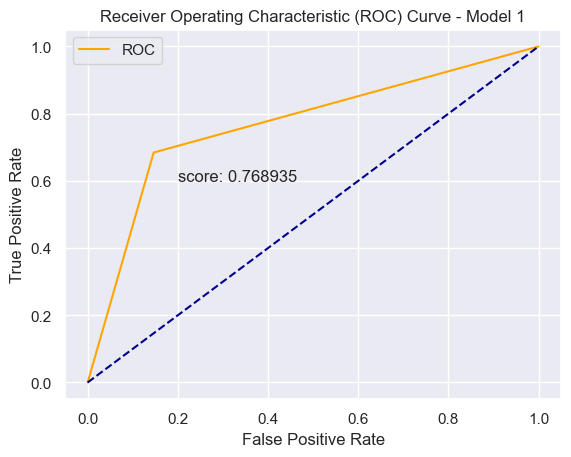

In [ ]:
## CALCULATE AUC
auc2 = roc_auc_score(y_test, y_pred2)
print('AUC: %f' %auc2)


fpr, tpr = roc_curve(y_test, y_pred2)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Model 2')
plt.text(y= 0.6, x=0.2, s=f'score: {round(auc2,6)}')
plt.legend()
plt.show()

## Model 3 

From model 2: changed Dropout from 0.25 to 0.15


Model 1: loss: 0.3402 - accuracy: 0.8436 - val_loss: 0.3690 - val_accuracy: 0.8500
Model 2: loss: 0.4240 - accuracy: 0.8492 - val_loss: 0.4184 - val_accuracy: 0.8667
Model 3: loss: 0.4021 - accuracy: 0.8715 - val_loss: 0.4017 - val_accuracy: 0.8667

In [ ]:
## initialise the simple neural network
model3 = Sequential() 

## input layers
model3.add(Dense(units = 16, kernel_initializer = 'uniform', activation =  'relu', input_dim = 12)) 

## hidden layer
model3.add(Dense(units = 8, kernel_initializer = 'uniform', activation =  'relu'))

####### adding another layer
model3.add(Dense(units = 4, kernel_initializer = 'uniform', activation =  'relu'))

##### drop out to 15% insteadof 25% (regularisation -- help to stop overfitting)
model3.add(Dropout(0.15)) #0.25 = 25% random will be set to 0 during training

## output layer
model3.add(Dense(units = 1, kernel_initializer = 'uniform', activation =  'sigmoid')) 

## compiling the ANN
model3.compile(optimizer = 'adam', loss =  'binary_crossentropy', metrics=['accuracy']) 

## summary: information about shape, type and parameters of network
model3.summary()

## train our network
## 20% for testing, 25% for validation and 55% for training
history2 = model3.fit(X_train, y_train, batch_size = 32, epochs = 80 , validation_split =0.25 )

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 16)                208       
                                                                 
 dense_81 (Dense)            (None, 8)                 136       
                                                                 
 dense_82 (Dense)            (None, 4)                 36        
                                                                 
 dropout_19 (Dropout)        (None, 4)                 0         
                                                                 
 dense_83 (Dense)            (None, 1)                 5         
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
6/6 [==============================] - 3s 10

In [ ]:
## save our model
#model3.save('ann_model3')

## load our saved data
model3 = tf.keras.models.load_model('ann_model3')

## predict X_test with model
y_pred3 = model3.predict(X_test)
## cap value
y_pred3 = np.where(y_pred3 > 0.5, 1, 0) #anything above 0.5 make it 1, else 0
#y_pred3

## classification report
print(classification_report(y_test, y_pred3)) 

2023-06-16 13:07:16.651670: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,4]
	 [[{{node inputs}}]]
2023-06-16 13:07:16.906807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,4]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ann_model3/assets


INFO:tensorflow:Assets written to: ann_model3/assets


2/2 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.72      0.68      0.70        19

    accuracy                           0.82        60
   macro avg       0.79      0.78      0.79        60
weighted avg       0.81      0.82      0.82        60



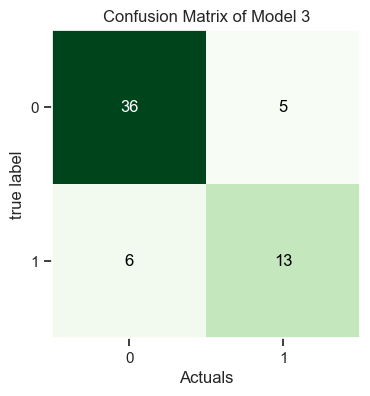

In [ ]:
#confusion matrix
conf_mat3 = confusion_matrix(y_test, y_pred3)
fig, ax = plot_confusion_matrix(conf_mat = conf_mat3 , figsize = (4,4), cmap = 'Greens')
plt.xlabel('Predictions', fontsize = 12 )
plt.xlabel('Actuals', fontsize = 12 )
plt.title('Confusion Matrix of Model 3', fontsize = 12 )
plt.show()

AUC: 0.781130


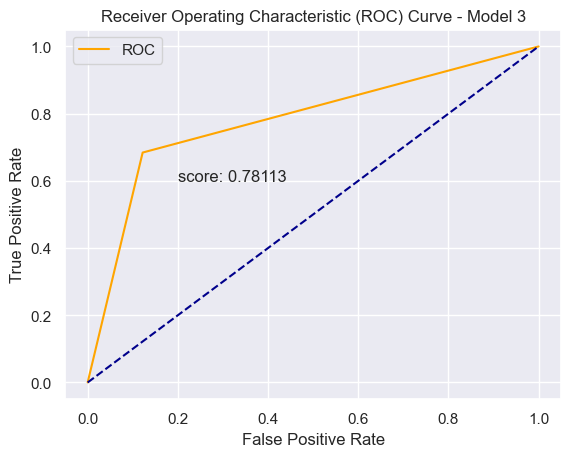

In [ ]:
## CALCULATE AUC
auc3 = roc_auc_score(y_test, y_pred3)
print('AUC: %f' %auc3)


fpr, tpr = roc_curve(y_test, y_pred3)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Model 3')
plt.text(y= 0.6, x=0.2, s=f'score: {round(auc3,6)}')
plt.legend()
plt.show()

## Conclusion

The best model I have found is model 3: with 2 hidden layers and a regularisation layer with a dropout of 15%.


Results from models:

Model 1: loss: 0.3402 - accuracy: 0.8436 - val_loss: 0.3690 - val_accuracy: 0.8500
Model 2: loss: 0.4240 - accuracy: 0.8492 - val_loss: 0.4184 - val_accuracy: 0.8667
Model 3: loss: 0.4021 - accuracy: 0.8715 - val_loss: 0.4017 - val_accuracy: 0.8667


The confusion matrices of the 3 models predicted the True Negatives the most and this could be due to the imbalance of data having more data
about people who didn't die from heart attack. 


Next step: 
-remove all outliers from platelets that still lingered
-remove some data about the people who didn't die so more balanced data.
-experiment with hyperparatuning the models